In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [2]:
import numpy as np
canv = ROOT.TCanvas("canv","canv",800,400)

In [3]:
lenX = 1001
lenY = 1201
radE = 300.
posA = 299
posC = 799
HV   = 3000.
delta = 1.
Tguess = 1500.
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
M = np.empty((lenX, lenY))
T.fill(Tguess)
M.fill(1)

In [58]:
from math import sqrt
for i in range(lenX):
    T[i,0]=0
    T[i,lenY-1]=0
    M[i,0]=0
    M[i,lenY-1]=0
for i in range(lenY):
    T[0,i]=0
    T[lenX-1,i]=0    
    M[0,i]=0
    M[lenX-1,i]=0
for i in range(lenX):
    for j in range(lenY):
        if i==posA or i==posA+1:
            if sqrt(pow(-600.5+delta*j,2))<=radE:
                T[i,j]=0
                M[i,j]=0
        if i==posC or i==posC+1:
            if sqrt(pow(-600.5+delta*j,2))<=radE:
                T[i,j]=HV
                M[i,j]=0

In [59]:
th1a = ROOT.TH1F("th1a",";x;T",lenX,-0.5,-0.5+delta*lenX)

Warning in <TROOT::Append>: Replacing existing TH1: th1a (Potential memory leak).


297.5


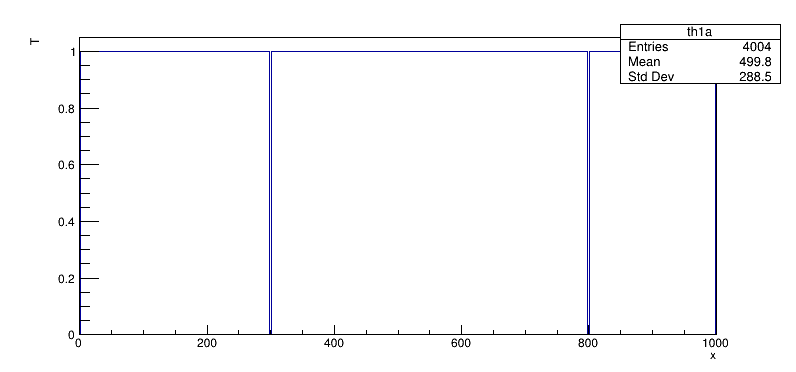

In [63]:
j_pos = 303
print(sqrt(pow(-600.5+delta*j_pos,2)))
for i in range(lenX):
    th1a[i+1] = VE(M[i,j_pos],0)
th1a.Draw()
canv.Draw()

In [67]:
maxIter=1
for iteration in range(0, maxIter):
    print(iteration)
    for i in range(lenX):
        for j in range(lenY):
            if M[i,j]:
                pre = T[i, j]
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

0
